In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.io import imread

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
import numpy
import cv2

import PIL
from PIL import Image

import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense,ZeroPadding2D

In [ ]:
# set the kaggle credentials

os.environ['KAGGLE_USERNAME'] = 'christinav'
os.environ['KAGGLE_KEY'] = '4d02f23cd3462fdc51419143f3433ac5'

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# download the dataset
!kaggle datasets download -d  gpiosenka/100-bird-species

# unzip dataset
!unzip /content/100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflating: train

In [ ]:
# Data File Path
processed_data_directory = '/content/'

In [ ]:
train_dir = '/content/train'
#Object of ImageDataGenrator, can specify data augmentation steps here
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
test_dir = '/content/test'
#Object of ImageDataGenrator, can specify data augmentation steps here
test_datagen = ImageDataGenerator(rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

val_dir = '/content/valid'
#Object of ImageDataGenrator, can specify data augmentation steps here
val_datagen = ImageDataGenerator(rescale = 1.0/255,
                                          fill_mode='nearest')
val_generator = val_datagen.flow_from_directory(test_dir,batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [ ]:
# Building our model!

model = keras.Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(units=400, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# Compiling our model

model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

epochs = 10

model.fit(train_generator,validation_data = test_generator,epochs=10,batch_size=256)

Epoch 1/10
1825/1825 [==============================] - 357s 195ms/step - loss: 5.6797 - accuracy: 0.0121 - val_loss: 5.2680 - val_accuracy: 0.0285
Epoch 2/10
1825/1825 [==============================] - 352s 193ms/step - loss: 4.9591 - accuracy: 0.0495 - val_loss: 4.4802 - val_accuracy: 0.0815
Epoch 3/10
1825/1825 [==============================] - 351s 192ms/step - loss: 4.4016 - accuracy: 0.1084 - val_loss: 3.9241 - val_accuracy: 0.1690
Epoch 4/10
1825/1825 [==============================] - 349s 191ms/step - loss: 4.0549 - accuracy: 0.1522 - val_loss: 3.6792 - val_accuracy: 0.2050
Epoch 5/10
1825/1825 [==============================] - 349s 191ms/step - loss: 3.8134 - accuracy: 0.1900 - val_loss: 3.3097 - val_accuracy: 0.2510
Epoch 6/10
1825/1825 [==============================] - 349s 191ms/step - loss: 3.6272 - accuracy: 0.2177 - val_loss: 3.1180 - val_accuracy: 0.2815
Epoch 7/10
1825/1825 [==============================] - 350s 192ms/step - loss: 3.4931 - accuracy: 0.2409 - val_

In [ ]:
model.save("model.h5")

In [ ]:
print(model.history.history)

{'loss': [5.679715156555176, 4.959107398986816, 4.401597499847412, 4.054898262023926, 3.813443660736084, 3.6271657943725586, 3.4931414127349854, 3.365250587463379, 3.2642641067504883, 3.178076982498169], 'accuracy': [0.012074398808181286, 0.049479346722364426, 0.10839556157588959, 0.15222306549549103, 0.19003905355930328, 0.21771596372127533, 0.24085427820682526, 0.2638384699821472, 0.28101664781570435, 0.2935706079006195], 'val_loss': [5.268038749694824, 4.480156421661377, 3.924119472503662, 3.6792168617248535, 3.3097403049468994, 3.1180105209350586, 3.0412304401397705, 2.845047950744629, 2.754920482635498, 2.654648542404175], 'val_accuracy': [0.02850000001490116, 0.08150000125169754, 0.16899999976158142, 0.20499999821186066, 0.25099998712539673, 0.2815000116825104, 0.30000001192092896, 0.3334999978542328, 0.3785000145435333, 0.3684999942779541]}


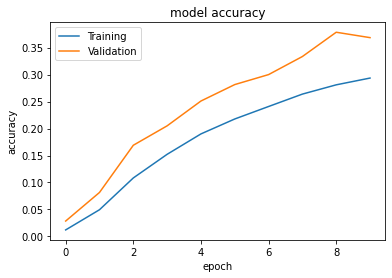

In [ ]:
# accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])
plt.show()

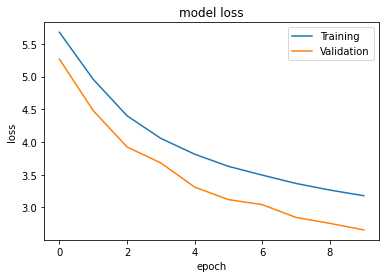

In [ ]:
# loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
def getKeybyValue(LabelDict, value):
    listItems = LabelDict.items()
    for item in listItems:
        if item[1] == value:
            return item[0]
    
    return None

In [ ]:
from keras.preprocessing.image import array_to_img
labDict = train_generator.class_indices
batchX, batchy = train_generator.next() 
num_img = batchX.shape[0]
imgs = [array_to_img(batchX[i]) for i in range(num_img)]

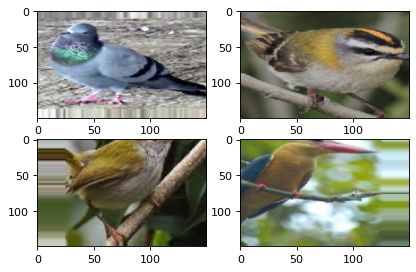

In [ ]:
h, w = 10, 10        
nrows, ncols = 2, 2  
figsize = [6,3]     
   
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, dpi = 80)
   
for i, axi in enumerate(ax.flat):
  axi.imshow(imgs[i], aspect = 'auto')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
plt.show()